# Google drive

In [15]:
# from google.colab import drive
# drive.mount('drive')

In [16]:
# cd drive/My\ Drive/Colab\ Notebooks/voice_phishing

In [17]:
ls -l

total 4106128
-rw-rw-r-- 1 user_01 user_01       9840 Nov 20  2020  All_accuracies.png
-rw-rw-r-- 1 user_01 user_01      18988 Dec 16  2020  All_accuracies_new.png
-rw-rw-r-- 1 user_01 user_01     179459 Apr 27 01:51 'Att-Based CNN-BiLSTM for Detecting Korean Vishing.ipynb'
-rw-rw-r-- 1 user_01 user_01     103398 Apr 27 01:40  Att_cnn_BiLSTM_architecture_220421.png
-rw-rw-r-- 1 user_01 user_01      79361 Nov 15  2020  BLSTM_architecture.png
-rw-rw-r-- 1 user_01 user_01  333770608 Apr 21 05:12  BiLSTM_10EP_20220421.h5
-rw-rw-r-- 1 user_01 user_01     138761 Apr 22 03:05  BiLSTM_FastText_encoding_model.ipynb
-rw-rw-r-- 1 user_01 user_01       8604 Nov  3  2020  BiLSTM_FastText_encoding_model.py
-rw-rw-r-- 1 user_01 user_01     192047 Nov 14  2020 'BiLSTM_FastText_encoding_model[Conflict].ipynb'
-rw-rw-r-- 1 user_01 user_01      94187 Apr 12 14:48  BiLSTM_architecture_0.png
-rw-rw-r-- 1 user_01 user_01      95614 Apr 16 03:40  BiLSTM_architecture_220414.png
-rw-rw-r-- 1 user_01 user_01  3

In [18]:
# from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.utils import to_categorical
# # from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense,GRU
# from keras.layers import Dropout
# from keras.layers import LSTM
# from keras.callbacks import ModelCheckpoint
# from keras.utils import np_utils
# from keras.layers import Embedding
# from keras.preprocessing.sequence import pad_sequences
# from keras.callbacks import ModelCheckpoint
# from keras.callbacks import EarlyStopping
# earlystopping = EarlyStopping(monitor = 'loss', verbose = 1,patience = 8, mode = 'min')
# from keras.layers import Bidirectional, GlobalMaxPool1D

import os, re, sys
from datetime import timedelta, datetime
import numpy as np
import pandas as pd
# from time import sleep
import string
# from textblob import TextBlob
import tensorflow as tf

# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk.stem import PorterStemmer
# from nltk.stem import WordNetLemmatizer

# from glob import glob
from tqdm import tqdm

# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
# from sklearn.feature_extraction import _stop_words
# from sklearn.preprocessing import StandardScaler, RobustScaler

In [19]:
# if tf.test.gpu_device_name():
#     print(f'Default GPU Device:{tf.test.gpu_device_name()}')
# else:
#     print("Please check your installation")

In [20]:
# tf.test.gpu_device_name()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2927 non-null   int64  
 1   transcript  2927 non-null   object 
 2   confidence  0 non-null      float64
 3   label       2927 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 91.6+ KB
None
id               0
transcript       0
confidence    2927
label            0
dtype: int64


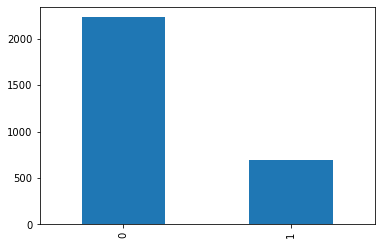

In [47]:
df = pd.read_csv('KorCCVi_v2.csv')
print(df.info())

df['label'].value_counts().plot(kind = 'bar')
print(df.isnull().sum())

In [48]:
# 한글과 공백을 제외하고 모두 제거
df['transcript'] = df['transcript'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['transcript'].replace('', np.nan, inplace=True)
print(df.isnull().sum())

id               0
transcript       0
confidence    2927
label            0
dtype: int64


/tmp/ipykernel_2230479/2250342535.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['transcript'] = df['transcript'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [52]:
df.drop_duplicates(subset = ['transcript'], inplace=True) # 중복 제거

In [36]:
df_vishing = df.loc[df['label'] == 1]
print(df_vishing.shape)
df_non_vishing = df.loc[df['label'] == 0]
print(df_non_vishing.shape)

(0, 4)
(0, 4)


In [53]:
df

,id,transcript,confidence,label
0,0,저는 여행 다니는 것을 굉장히 좋아하는데요 그래가지고 스페인이나 뭐 영국 유럽 아니...,NaN,0
1,1,반려동물을 키우고 계신가요 혹시 안 키우고 계시다면은 어떤 반려동물을 한번 키워보고...,NaN,0
2,2,씨는 주로 어떤 음식 좋아하시나요 저는 근데 가리는 게 거의 없어서 대부분 다 잘...,NaN,0
3,3,씨는 반려동물 어 좋 뭐 어떤 동물 좋아하세요 저는 고양이를 정말 좋아하는데요 정...,NaN,0
4,4,가장 좋아하는 음식이 무엇인가요 저는 주로 먹는 거를 좋아해서 음식을 가리지 않고 ...,NaN,0
...,...,...,...,...
2922,2922,지금까지 사실확인서를 연락드렸습니다 하고 있는데 이런 사건 때문에 내가 여쭤볼게 있...,NaN,1
2923,2923,연료 데이는 사건 때문에 연락 드렸는데 혹시 김명철씨 가십니까 모르시고 아는 사람도...,NaN,1
2924,2924,장 절 일어났습니까 장소 잡고 님께서는 세 남성 김동술 알고 계십니까 아니요 본인 ...,NaN,1
2925,2925,네네 여보세요뭐 어디세요아 네 안녕하세요 저희 그 하나캐피탈에서 연락을 드렸습니다아...,NaN,1


## Installation of Mecab-ko-for-GoogleColab

In [22]:
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [23]:
# pwd

In [24]:
%%time
# !bash install_mecab-ko_on_colab190912.sh
# !bash Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220111.sh

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 11.4 µs


### Test of MeCab

In [54]:
# from konlpy.tag import Mecab
# mecab = Mecab()
# text = '그중에서 제일 기 좋았던 거는 스페인이랑 포르투갈이었거든요.'
# mecab.pos(text)

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

In [26]:
# mecab.morphs(text)

## Prepare the vishing vocabs 

In [27]:
%%time
data_for_vocb=[]
data_for_vocb_negative=[]
Y=[]
Y_negative=[]
vocab=[]
lenn=[]

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 11 µs


In [14]:
%%time
def preprocess_vishing_transcript(df_transcript, save_path, tokenizer_type='mecab'):
  split_doc=[]
  #stop word
  stop_words = ["을", "를", "이", "가", "은", "는", "ㅡ", "의", "에","에서",
	              "로", "으로", "에요", "예요", "으시",
								"XXX", "xxx"]

  for text in tqdm(df_transcript['transcript']):
    # print(text)

    # morphemezation(tokenization) of the transcripts
    if tokenizer_type == 'mecab':
      split_doc = mecab.morphs(text)
    elif tokenizer_type == 'space':
		  # tokenization using the split method
      split_doc=text.split('\n') 
		
    # print('*'*100)
    # print(split_doc)
    # print('*'*100)

    data=[]
    for i in split_doc:
      # print(i)
      words=i.split()
      # print(words)
      # print('*'*100)

      remove_pun=[re.sub(r'[^\w\s]','',s,0, re.MULTILINE | re.IGNORECASE) for s in words]
      # print('Cleaning punctuation\n', remove_pun)
      remove_pun_=[re.sub(r"(o|O|ㅇ|0|x){2,}","",s,0, re.MULTILINE | re.IGNORECASE) for s in remove_pun]
      # print('Cleaning extra characters\n', remove_pun_)
      # print('*'*100)
      remove_pun2=' '.join(remove_pun_).split()
      # print(remove_pun2)
      # print('*'*100)

      table = str.maketrans('', '', string.punctuation)
      # print('table\n',table)
      tokens = [w.translate(table) for w in remove_pun2]
      # print('translate\n',tokens)
      # print('*'*100)

      #remove stopwords
      tokens = [word for word in tokens if word not in stop_words]
      # print('remove stopwprds\n', len(tokens))
      # print('*'*100)
      # tokens=[okt.morphs(i, norm=True, stem=True) for i in tokens]
      # tokens=[mecab.morphs(i) for i in tokens]
      # print(i)
      # print('Morphs\n', tokens)
      # print('*'*100)

      # save the tokens in the file
      if len(tokens)==0:
      	pass
      else:
      	final_list=open(save_path, 'a')
      	final_list.write(str(tokens))

      	data.append(tokens)
      	data_for_vocb.append(tokens)
      	Y.append(1)
      # print('#'*100)
  list_of_all_words=[]

  for sentence in data_for_vocb:
    for word in sentence:
      list_of_all_words.append(word)
		
  vocab=sorted(set(list_of_all_words))
	
  return(vocab,list_of_all_words)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [15]:
%%time
vocab,list_of_all_words=preprocess_vishing_transcript(df_vishing,
                                                      "DL/vishing_tokens_space_" + datetime.now().strftime("%Y%m%d") + ".txt",
                                                      "space")

print("\nvocab length ",len(vocab))
print("data_for_vocb length ",len(data_for_vocb))
print("list_of_all_words length ",len(list_of_all_words))

100%|██████████| 695/695 [00:38<00:00, 17.92it/s]


vocab length  37523
data_for_vocb length  17932
list_of_all_words length  238890
CPU times: user 7.83 s, sys: 2.33 s, total: 10.2 s
Wall time: 38.9 s


In [16]:
vocab

['0',
 '01',
 '010',
 '01063124246입니다네네네네',
 '010으로',
 '010인데요',
 '0130',
 '013이요',
 '015',
 '016',
 '01일',
 '02',
 '021',
 '0215662759',
 '0216203130입니다',
 '022011111한테',
 '022106175',
 '0253023149',
 '025303114',
 '025303149',
 '0254431762',
 '026049',
 '0261056017',
 '0264690303',
 '026703877으로',
 '02로',
 '02에',
 '02월',
 '0311',
 '0311요',
 '0322919489',
 '06',
 '06496680668',
 '0668',
 '0683',
 '0685',
 '07학번',
 '07학번이니까',
 '08',
 '0813',
 '09',
 '09년도부터',
 '0원',
 '1',
 '10',
 '1024',
 '102동',
 '1091',
 '10개',
 '10개에서',
 '10개월',
 '10개월이라',
 '10까지',
 '10날',
 '10년',
 '10년까지',
 '10년짜리',
 '10달까지',
 '10대',
 '10동',
 '10만',
 '10만에',
 '10만원',
 '10만원대',
 '10명',
 '10번',
 '10번까지',
 '10번이나',
 '10부까지',
 '10분',
 '10분에서',
 '10분이니까',
 '10분이면',
 '10분이요',
 '10분정도',
 '10분정도요',
 '10분짜리',
 '10시',
 '10시가',
 '10시라고',
 '10시면',
 '10시부터',
 '10시부터요',
 '10시야',
 '10시쯤',
 '10여명을',
 '10원도',
 '10원짜리',
 '10월',
 '10월달에',
 '10월에',
 '10월인가',
 '10으로',
 '10이하대',
 '10이하대에',
 '10일',
 '10일경',
 '10일경에',
 '10일날',
 '10일로',
 '

In [17]:
# data_for_vocb

In [18]:
# list_of_all_words

## Prepare the non-vishing vocabs 

In [19]:
%%time
def preprocess_non_vishing_transcript(df_transcript, save_path, tokenizer_type='mecab'):
  split_doc=[]
  #stop word
  stop_words = ["을", "를", "이", "가", "은", "는", "ㅡ", "의", "에","에서",
	              "로", "으로", "에요", "예요", "으시",
								"XXX", "xxx"]

  for text in tqdm(df_transcript['transcript']):
    # print(text)

    # morphemezation(tokenization) of the transcripts
    if tokenizer_type == 'mecab':
      split_doc = mecab.morphs(text)
    elif tokenizer_type == 'space':
		  # tokenization using the split method
      split_doc=text.split('\n') 
		
    # print('*'*100)
    # print(split_doc)
    # print('*'*100)

    data=[]
    for i in split_doc:
      # print(i)
      words=i.split()
      # print(words)
      # print('*'*100)

      remove_pun=[re.sub(r'[^\w\s]','',s,0, re.MULTILINE | re.IGNORECASE) for s in words]
      # print('Cleaning punctuation\n', remove_pun)
      remove_pun_=[re.sub(r"(o|O|ㅇ|0|x){2,}","",s,0, re.MULTILINE | re.IGNORECASE) for s in remove_pun]
      # print('Cleaning extra characters\n', remove_pun_)
      # print('*'*100)
      remove_pun2=' '.join(remove_pun_).split()
      # print(remove_pun2)
      # print('*'*100)

      table = str.maketrans('', '', string.punctuation)
      # print('table\n',table)
      tokens = [w.translate(table) for w in remove_pun2]
      # print('translate\n',tokens)
      # print('*'*100)

      #remove stopwords
      tokens = [word for word in tokens if word not in stop_words]
      # print('remove stopwprds\n', len(tokens))
      # print('*'*100)

      # tokens=[okt.morphs(i, norm=True, stem=True) for i in tokens]
      # tokens=[mecab.morphs(i) for i in tokens]
      # print(i)
      # print('Morphs\n', tokens)
      # print('*'*100)
      
      # save the tokens in the file
      if len(tokens)==0:
        pass
      else:
        final_list=open(save_path, 'a')
        final_list.write(str(tokens))
        
        data.append(tokens)
        data_for_vocb_negative.append(tokens)
        Y_negative.append(0)
  list_of_all_words_negative=[]

  for sentence in data_for_vocb_negative:
    for word in sentence:
      list_of_all_words_negative.append(word)
	
  vocab=sorted(set(list_of_all_words_negative))
  return(vocab,list_of_all_words_negative)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


In [20]:
%%time
vocab_negative,list_of_all_words_negative=preprocess_non_vishing_transcript(df_non_vishing, 
                                                                            "DL/non_vishing_tokens_space_" + datetime.now().strftime("%Y%m%d") + ".txt",
                                                                            "space"
                                                                            )

#print("vocab_negative",(vocab_negative))
print("\nvocab_negative length ",len(vocab_negative))
#print("data_for_vocb",data_for_vocb)
print("data_for_vocb_negative ",len(data_for_vocb_negative))
print("list_of_all_words_negative length ",len(list_of_all_words_negative))

100%|██████████| 2232/2232 [00:47<00:00, 46.60it/s]



vocab_negative length  232495
data_for_vocb_negative  2232
list_of_all_words_negative length  3021758
CPU times: user 38.8 s, sys: 784 ms, total: 39.5 s
Wall time: 48.8 s


In [21]:
# vocab_negative

In [22]:
# data_for_vocb_negative

In [23]:
# list_of_all_words_negative

# Save the NPZ file

In [24]:
%%time
#dataset_size=int(sys.argv[1])
#print ('Argument List:', dataset_size)
#data_for_vocb=data_for_vocb[:dataset_size]

data_for_vocb=data_for_vocb
data_for_vocb_negative=data_for_vocb_negative

Y=Y
Y_negative=Y_negative

#data_for_vocb_negative=data_for_vocb_negative[:dataset_size]

#Y=Y[:dataset_size]
#Y_negative=Y_negative[:dataset_size]

data_for_vocb.extend(data_for_vocb_negative)
vocab.extend(vocab_negative)
Y.extend(Y_negative)

print("data_for_vocb",len(data_for_vocb))  
print("Y",len(Y))

if 1 in Y:
	print("yes")
print(Y.count(1))
print(Y.count(0))
	
np.savez("DL/outfile_space_" + datetime.now().strftime("%Y%m%d") + ".npz",
					data_for_vocb,
					vocab,
					Y
				)

data_for_vocb 20164
Y 20164
yes
17932
2232


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


CPU times: user 1.86 s, sys: 178 ms, total: 2.04 s
Wall time: 2.13 s
